In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/User/Desktop/kshi/rain/data/kar.csv",sep=",")
data = data.fillna(data.mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 19 columns):
SUBDIVISION    345 non-null object
YEAR           345 non-null int64
JAN            345 non-null float64
FEB            345 non-null float64
MAR            345 non-null float64
APR            345 non-null float64
MAY            345 non-null float64
JUN            345 non-null float64
JUL            345 non-null float64
AUG            345 non-null float64
SEP            345 non-null float64
OCT            345 non-null float64
NOV            345 non-null float64
DEC            345 non-null float64
ANNUAL         345 non-null float64
Jan-Feb        345 non-null float64
Mar-May        345 non-null float64
Jun-Sep        345 non-null float64
Oct-Dec        345 non-null float64
dtypes: float64(17), int64(1), object(1)
memory usage: 51.3+ KB


In [3]:
print(data.head())

         SUBDIVISION  YEAR  JAN  FEB   MAR   APR    MAY     JUN     JUL  \
0  COASTAL KARNATAKA  1901  1.8  0.6  10.7  52.4   81.6   960.9   991.2   
1  COASTAL KARNATAKA  1902  3.2  0.3   4.9  10.2   54.6   698.4  1401.6   
2  COASTAL KARNATAKA  1903  0.7  0.0   0.0   4.1  202.8   536.5  1405.5   
3  COASTAL KARNATAKA  1904  2.4  0.0   4.8  23.7   93.2  1108.2  1070.0   
4  COASTAL KARNATAKA  1905  0.0  0.2   0.0   6.4   83.1   767.3   777.3   

     AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  \
0  606.4  108.0  120.5  104.9   17.8  3056.9      2.4    144.7   2666.6   
1  454.2  708.4  180.4   50.8  132.2  3699.2      3.5     69.7   3262.6   
2  593.8  304.4  185.0   79.3    5.3  3317.4      0.7    206.9   2840.1   
3  465.6  245.3  127.2    0.7    0.0  3141.1      2.4    121.7   2889.1   
4  586.9  172.9  222.2   36.1    0.0  2652.3      0.2     89.4   2304.3   

   Oct-Dec  
0    243.3  
1    363.5  
2    269.6  
3    127.9  
4    258.4  


In [4]:
print(data.describe())

              YEAR         JAN         FEB         MAR         APR  \
count   345.000000  345.000000  345.000000  345.000000  345.000000   
mean   1958.000000    2.628488    2.951304    7.655362   32.499420   
std      33.244601    5.145426    6.140374   14.510653   22.164135   
min    1901.000000    0.000000    0.000000    0.000000    0.000000   
25%    1929.000000    0.000000    0.000000    0.600000   15.700000   
50%    1958.000000    0.300000    0.300000    3.500000   27.100000   
75%    1987.000000    2.600000    2.700000    8.500000   43.800000   
max    2015.000000   28.500000   44.300000  161.400000  127.700000   

              MAY          JUN          JUL          AUG         SEP  \
count  345.000000   345.000000   345.000000   345.000000  345.000000   
mean    87.307826   361.245507   498.973043   335.772174  193.302319   
std     83.063360   359.645261   480.124823   305.475266  122.724962   
min      3.500000    38.200000    37.000000    28.000000   27.700000   
25%     4

In [5]:
#data.hist(figsize=(24,24));

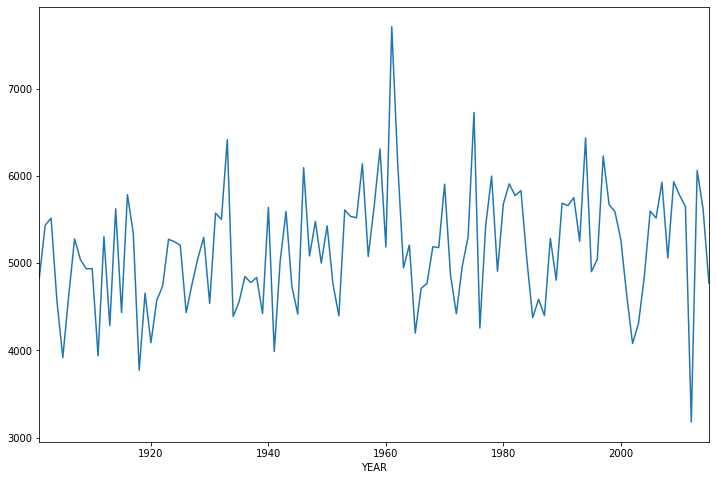

In [6]:
data.groupby("YEAR").sum()['ANNUAL'].plot(figsize=(12,8));

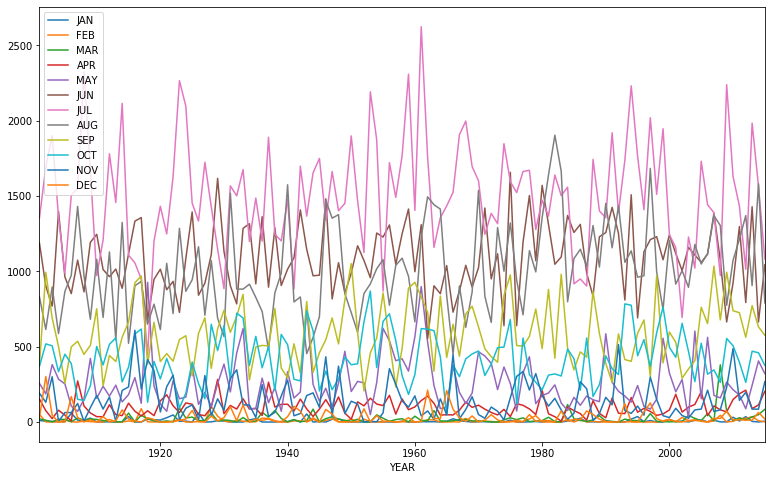

In [7]:
data[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(figsize=(13,8));

In [8]:
#data[['YEAR','Jan-Feb', 'Mar-May',
#       'Jun-Sep', 'Oct-Dec']].groupby("YEAR").sum().plot(figsize=(13,8));

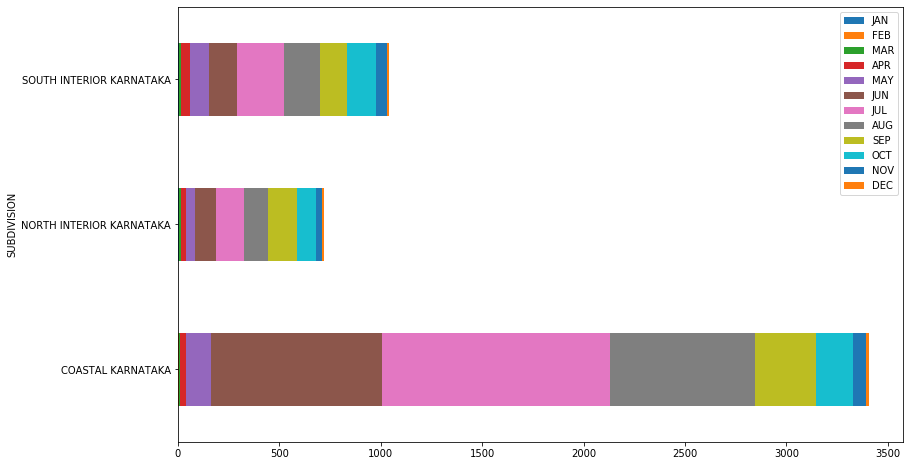

In [9]:
data[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").mean().plot.barh(stacked=True,figsize=(13,8));

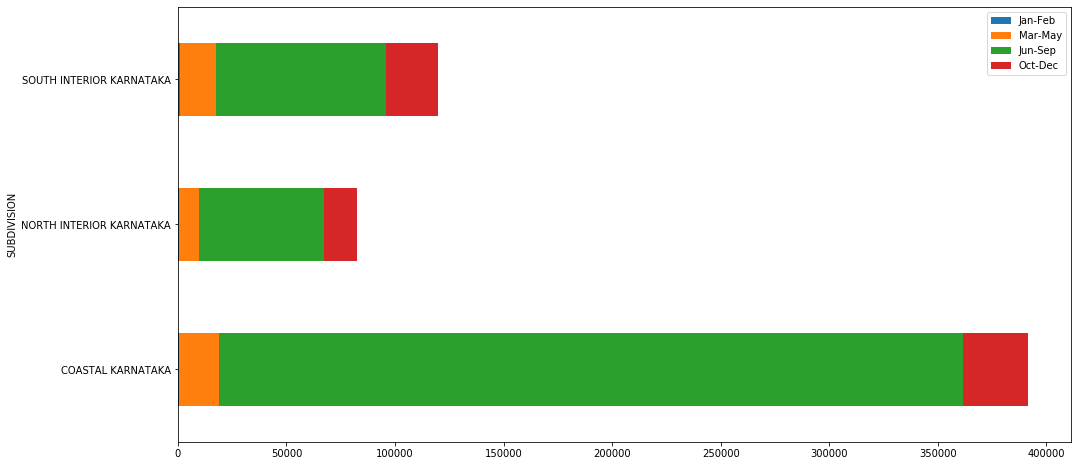

In [10]:
data[['SUBDIVISION', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").sum().plot.barh(stacked=True,figsize=(16,8));

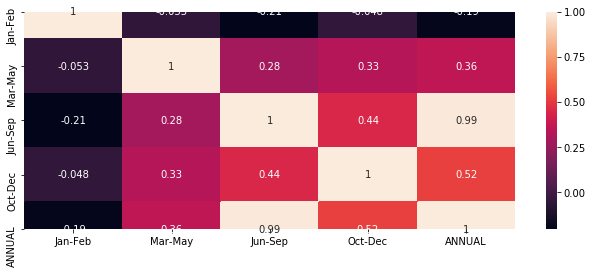

In [11]:
plt.figure(figsize=(11,4))
sns.heatmap(data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']].corr(),annot=True)
plt.show()

In [12]:
#plt.figure(figsize=(11,4))
#sns.heatmap(data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
#plt.show()

In [13]:
#Function to plot the graphs
def plot_graphs(groundtruth,prediction,title):        
    N = 9
    ind = np.arange(N)  # the x locations for the groups
    width = 0.27       # the width of the bars

    fig = plt.figure()
    fig.suptitle(title, fontsize=12)
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, groundtruth, width, color='r')
    rects2 = ax.bar(ind+width, prediction, width, color='g')

    ax.set_ylabel("Amount of rainfall")
    ax.set_xticks(ind+width)
    ax.set_xticklabels( ('APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC') )
    ax.legend( (rects1[0], rects2[0]), ('Ground truth', 'Prediction') )

#     autolabel(rects1)
    for rect in rects1:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
    for rect in rects2:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
#     autolabel(rects2)

    plt.show()

In [14]:
# seperation of training and testing data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [15]:
#test 2010
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2010]

data_2010 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'COASTAL KARNATAKA'])

X_year_2010 = None; y_year_2010 = None
for i in range(data_2010.shape[1]-3):
    if X_year_2010 is None:
        X_year_2010 = data_2010[:, i:i+3]
        y_year_2010 = data_2010[:, i+3]
    else:
        X_year_2010 = np.concatenate((X_year_2010, data_2010[:, i:i+3]), axis=0)
        y_year_2010 = np.concatenate((y_year_2010, data_2010[:, i+3]), axis=0)


In [16]:
#test 2005
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2005]

data_2005 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'COASTAL KARNATAKA'])

X_year_2005 = None; y_year_2005 = None
for i in range(data_2005.shape[1]-3):
    if X_year_2005 is None:
        X_year_2005 = data_2005[:, i:i+3]
        y_year_2005 = data_2005[:, i+3]
    else:
        X_year_2005 = np.concatenate((X_year_2005, data_2005[:, i:i+3]), axis=0)
        y_year_2005 = np.concatenate((y_year_2005, data_2005[:, i+3]), axis=0)

In [17]:
#test 2015
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2015]

data_2015 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'COASTAL KARNATAKA'])

X_year_2015 = None; y_year_2015 = None
for i in range(data_2015.shape[1]-3):
    if X_year_2015 is None:
        X_year_2015 = data_2015[:, i:i+3]
        y_year_2015 = data_2015[:, i+3]
    else:
        X_year_2015 = np.concatenate((X_year_2015, data_2015[:, i:i+3]), axis=0)
        y_year_2015 = np.concatenate((y_year_2015, data_2015[:, i+3]), axis=0)

In [18]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

109.86315081482842


MEAN 2005
385.5777777777778 283.33764879803016
Standard deviation 2005
401.3640181452846 281.0485470529568
MEAN 2010
407.6000000000001 301.8542712260063
Standard deviation 2010
363.31598123702486 253.30318474826052
MEAN 2015
341.2444444444444 267.14221308695033
Standard deviation 2015
306.36350997942554 210.65767538311923


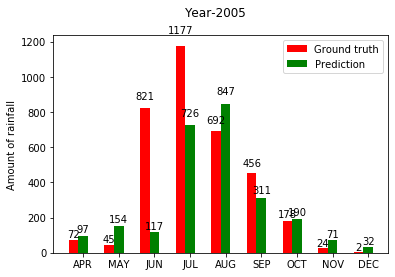

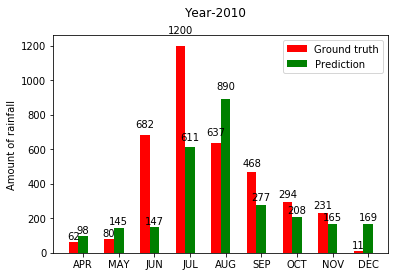

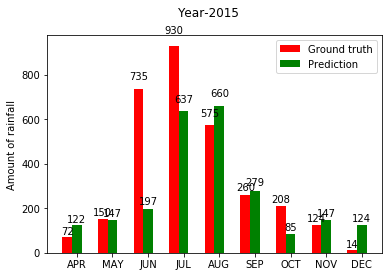

In [19]:

#2005
y_year_pred_2005 = reg.predict(X_year_2005)


#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
y_year_pred_2015 = reg.predict(X_year_2015)

print("MEAN 2005")
print(np.mean(y_year_2005),np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print("MEAN 2010")
print(np.mean(y_year_2010),np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print("MEAN 2015")
print(np.mean(y_year_2015),np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))


plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [20]:
from sklearn.svm import SVR

# SVM model
clf = SVR(gamma='auto', C=0.1, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

136.92362419434863


MEAN 2005
385.5777777777778 283.33764879803016
Standard deviation 2005
401.3640181452846 281.0485470529568
MEAN 2010
407.6000000000001 301.8542712260063
Standard deviation 2010
363.31598123702486 253.30318474826052
MEAN 2015
341.2444444444444 267.14221308695033
Standard deviation 2015
306.36350997942554 210.65767538311923


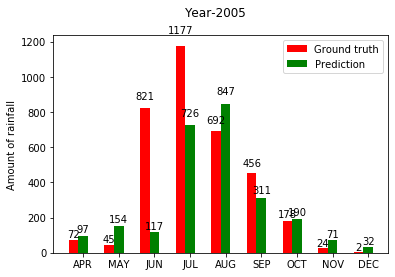

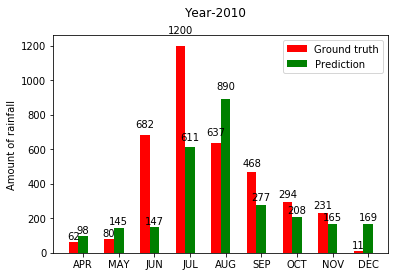

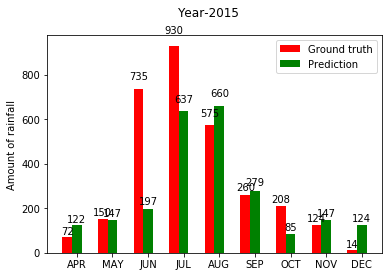

In [21]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)

#2010
y_year_pred_2010 = reg.predict(X_year_2010)#
    
#2015
y_year_pred_2015 = reg.predict(X_year_2015)
print("MEAN 2005")
print(np.mean(y_year_2005),np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print("MEAN 2010")
print(np.mean(y_year_2010),np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print("MEAN 2015")
print(np.mean(y_year_2015),np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [22]:
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(3,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Using TensorFlow backend.






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3, 1)              0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3, 64)             192       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 3, 128)            16512     
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               49280     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
______

In [23]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))




Train on 2514 samples, validate on 280 samples
Epoch 1/10





2514/2514 [==============================] - 6s 2ms/step - loss: 49856.7193 - mean_absolute_error: 118.3922 - val_loss: 44360.5475 - val_mean_absolute_error: 110.8490
Epoch 2/10
2514/2514 [==============================] - 0s 93us/step - loss: 40477.3678 - mean_absolute_error: 105.4667 - val_loss: 39231.7054 - val_mean_absolute_error: 105.9631
Epoch 3/10
2514/2514 [==============================] - 0s 96us/step - loss: 37797.6567 - mean_absolute_error: 106.5172 - val_loss: 37294.6600 - val_mean_absolute_error: 103.6775
Epoch 4/10
2514/2514 [==============================] - 0s 97us/step - loss: 35287.4077 - mean_absolute_error: 104.1331 - val_loss: 36251.6266 - val_mean_absolute_error: 103.2353
Epoch 5/10
2514/2514 [==============================] - 0s 96us/step - loss: 34988.9080 - mean_absolute_error: 107.2758 - val_loss: 38353.7007 - val_mean_absolute_error: 104.3258
Epoch 6/10
2514/2514 [=============================

MEAN 2005
385.5777777777778 283.33764879803016
Standard deviation 2005
401.3640181452846 281.0485470529568
MEAN 2010
407.6000000000001 301.8542712260063
Standard deviation 2010
363.31598123702486 253.30318474826052
MEAN 2015
341.2444444444444 267.14221308695033
Standard deviation 2015
306.36350997942554 210.65767538311923


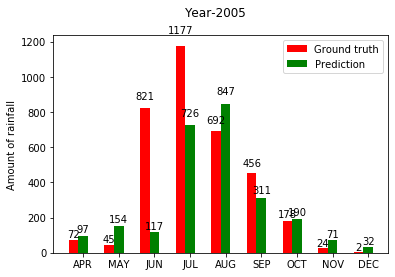

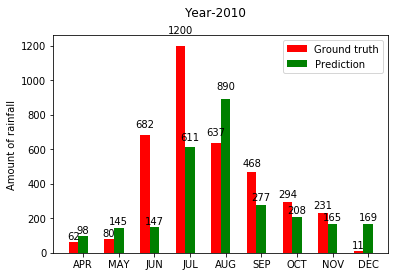

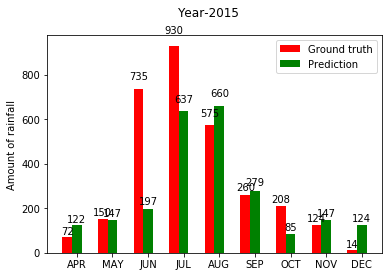

In [24]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)

#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
#2015
y_year_pred_2015 = reg.predict(X_year_2015)

print("MEAN 2005")
print(np.mean(y_year_2005),np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print("MEAN 2010")
print(np.mean(y_year_2010),np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print("MEAN 2015")
print(np.mean(y_year_2015),np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [25]:
# spliting training and testing data only for KARNATAKA
telangana = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['SUBDIVISION'] == 'NORTH INTERIOR KARNATAKA'])

X = None; y = None
for i in range(telangana.shape[1]-3):
    if X is None:
        X = telangana[:, i:i+3]
        y = telangana[:, i+3]
    else:
        X = np.concatenate((X, telangana[:, i:i+3]), axis=0)
        y = np.concatenate((y, telangana[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [26]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

50.964787937900475


MEAN 2005
385.5777777777778 162.13824086437435
Standard deviation 2005
401.3640181452846 211.71996228391725
MEAN 2010
407.6000000000001 175.0044519020281
Standard deviation 2010
363.31598123702486 189.4977934711937
MEAN 2015
341.2444444444444 153.75943010846197
Standard deviation 2015
306.36350997942554 161.19364541210956


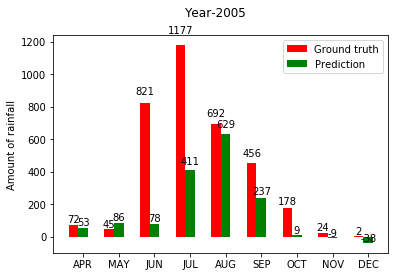

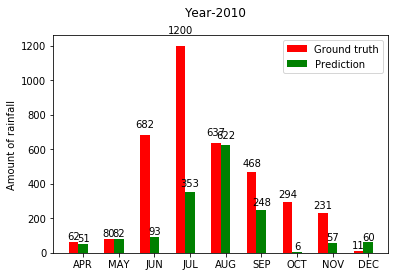

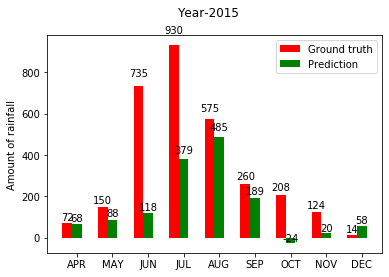

In [27]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)

#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
#2015
y_year_pred_2015 = reg.predict(X_year_2015)

print("MEAN 2005")
print(np.mean(y_year_2005),np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print("MEAN 2010")
print(np.mean(y_year_2010),np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print("MEAN 2015")
print(np.mean(y_year_2015),np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [28]:
from sklearn.svm import SVR

# SVM model
clf = SVR(kernel='rbf', gamma='auto', C=0.5, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

79.9691064243299


MEAN 2005
385.5777777777778 162.13824086437435
Standard deviation 2005
401.3640181452846 211.71996228391725
MEAN 2010
407.6000000000001 175.0044519020281
Standard deviation 2010
363.31598123702486 189.4977934711937
MEAN 2015
341.2444444444444 153.75943010846197
Standard deviation 2015
306.36350997942554 161.19364541210956


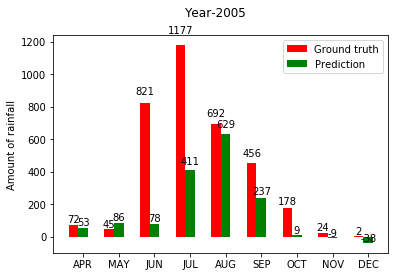

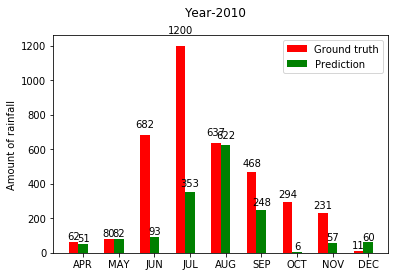

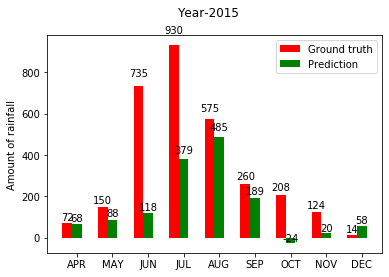

In [29]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)

#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
#2015
y_year_pred_2015 = reg.predict(X_year_2015)

print("MEAN 2005")
print(np.mean(y_year_2005),np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print("MEAN 2010")
print(np.mean(y_year_2010),np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print("MEAN 2015")
print(np.mean(y_year_2015),np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [30]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

Train on 921 samples, validate on 103 samples
Epoch 1/10
921/921 [==============================] - 0s 106us/step - loss: 7196.9625 - mean_absolute_error: 65.7321 - val_loss: 3511.6353 - val_mean_absolute_error: 44.7414
Epoch 2/10
921/921 [==============================] - 0s 99us/step - loss: 3802.4762 - mean_absolute_error: 46.2398 - val_loss: 2282.3658 - val_mean_absolute_error: 37.6681
Epoch 3/10
921/921 [==============================] - 0s 102us/step - loss: 3425.6928 - mean_absolute_error: 43.5472 - val_loss: 2139.3898 - val_mean_absolute_error: 36.6967
Epoch 4/10
921/921 [==============================] - 0s 100us/step - loss: 3201.8096 - mean_absolute_error: 43.1949 - val_loss: 2188.7134 - val_mean_absolute_error: 36.7683
Epoch 5/10
921/921 [==============================] - 0s 100us/step - loss: 3132.3778 - mean_absolute_error: 42.8850 - val_loss: 2152.1590 - val_mean_absolute_error: 36.1578
Epoch 6/10
921/921 [==============================] - 0s 99us/step - loss: 3088.2723 

MEAN 2005
385.5777777777778 162.13824086437435
Standard deviation 2005
401.3640181452846 211.71996228391725
MEAN 2010
407.6000000000001 175.0044519020281
Standard deviation 2010
363.31598123702486 189.4977934711937
MEAN 2015
341.2444444444444 153.75943010846197
Standard deviation 2015
306.36350997942554 161.19364541210956


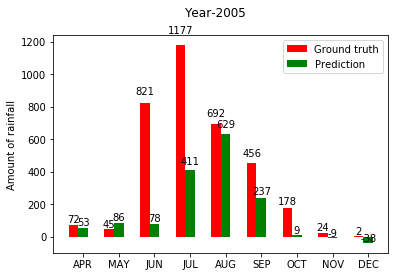

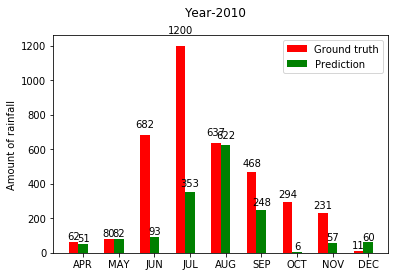

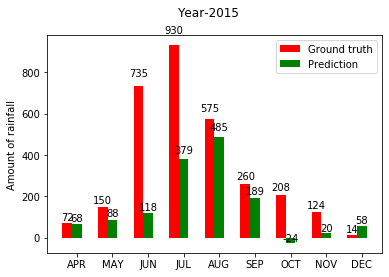

In [31]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)

#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
#2015
y_year_pred_2015 = reg.predict(X_year_2015)

print("MEAN 2005")
print(np.mean(y_year_2005),np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print("MEAN 2010")
print(np.mean(y_year_2010),np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print("MEAN 2015")
print(np.mean(y_year_2015),np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [32]:
district = pd.read_csv("../data/district_wise_rainfall_normal.csv",sep=",")
district = district.fillna(district.mean())
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 19 columns):
STATE_UT_NAME    641 non-null object
DISTRICT         641 non-null object
JAN              641 non-null float64
FEB              641 non-null float64
MAR              641 non-null float64
APR              641 non-null float64
MAY              641 non-null float64
JUN              641 non-null float64
JUL              641 non-null float64
AUG              641 non-null float64
SEP              641 non-null float64
OCT              641 non-null float64
NOV              641 non-null float64
DEC              641 non-null float64
ANNUAL           641 non-null float64
Jan-Feb          641 non-null float64
Mar-May          641 non-null float64
Jun-Sep          641 non-null float64
Oct-Dec          641 non-null float64
dtypes: float64(17), object(2)
memory usage: 95.3+ KB


In [33]:
print(district.head())

                 STATE_UT_NAME       DISTRICT    JAN   FEB    MAR    APR  \
0  ANDAMAN And NICOBAR ISLANDS        NICOBAR  107.3  57.9   65.2  117.0   
1  ANDAMAN And NICOBAR ISLANDS  SOUTH ANDAMAN   43.7  26.0   18.6   90.5   
2  ANDAMAN And NICOBAR ISLANDS  N & M ANDAMAN   32.7  15.9    8.6   53.4   
3            ARUNACHAL PRADESH          LOHIT   42.2  80.8  176.4  358.5   
4            ARUNACHAL PRADESH     EAST SIANG   33.3  79.5  105.9  216.5   

     MAY    JUN    JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  \
0  358.5  295.5  285.0  271.9  354.8  326.0  315.2  250.9  2805.2    165.2   
1  374.4  457.2  421.3  423.1  455.6  301.2  275.8  128.3  3015.7     69.7   
2  343.6  503.3  465.4  460.9  454.8  276.1  198.6  100.0  2913.3     48.6   
3  306.4  447.0  660.1  427.8  313.6  167.1   34.1   29.8  3043.8    123.0   
4  323.0  738.3  990.9  711.2  568.0  206.9   29.5   31.7  4034.7    112.8   

   Mar-May  Jun-Sep  Oct-Dec  
0    540.7   1207.2    892.1  
1    483.5  

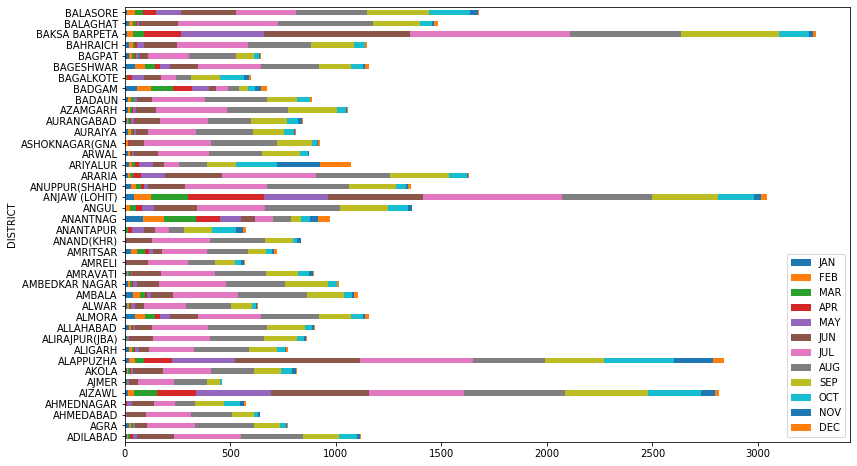

In [34]:
district[['DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("DISTRICT").mean()[:40].plot.barh(stacked=True,figsize=(13,8));

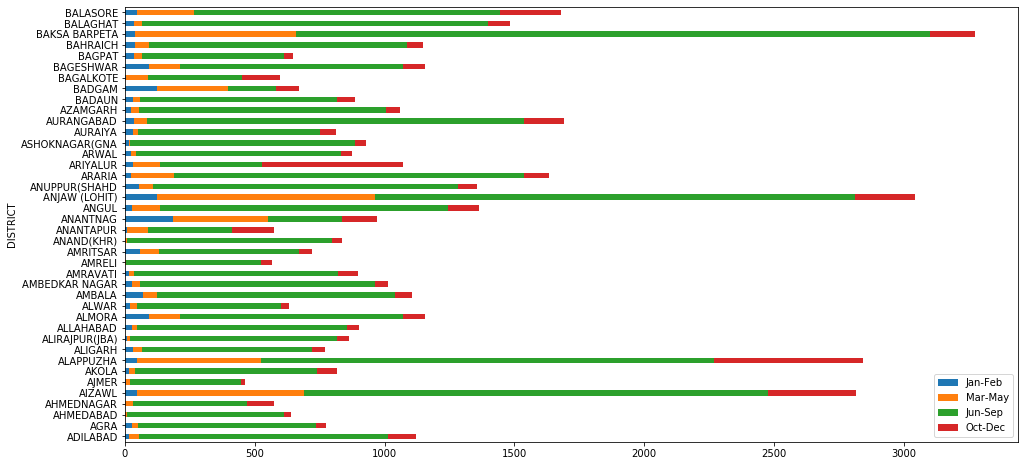

In [35]:
district[['DISTRICT', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("DISTRICT").sum()[:40].plot.barh(stacked=True,figsize=(16,8));

In [36]:
ap_data = district[district['STATE_UT_NAME'] == 'KARNATAKA']

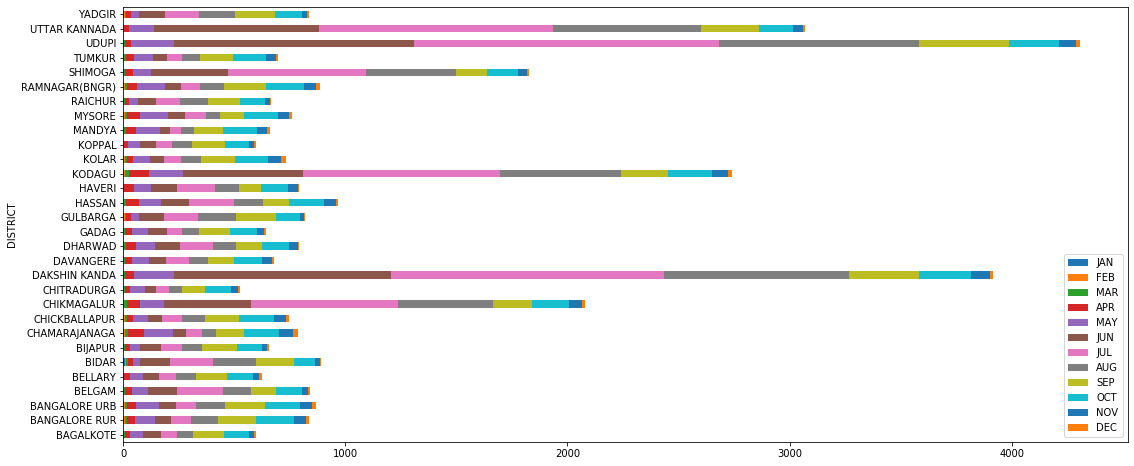

In [37]:
ap_data[['DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("DISTRICT").mean()[:40].plot.barh(stacked=True,figsize=(18,8));

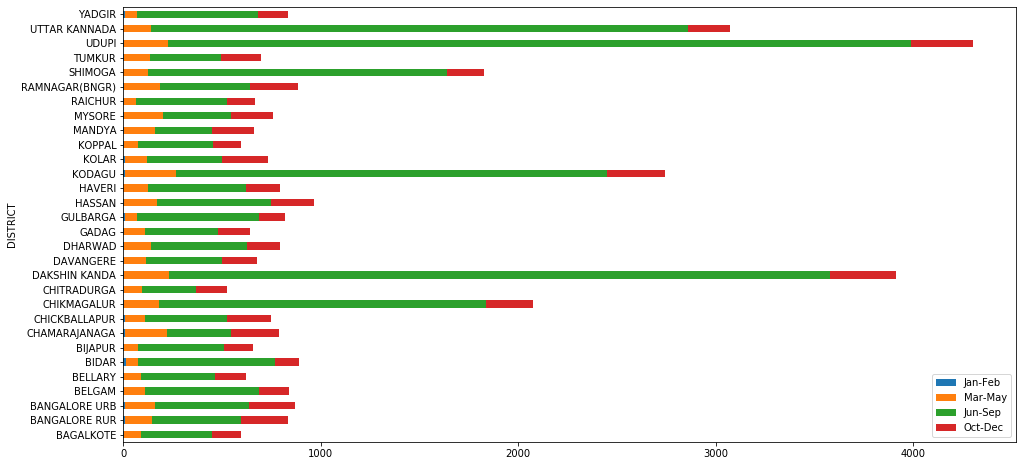

In [38]:
ap_data[['DISTRICT', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("DISTRICT").sum()[:40].plot.barh(stacked=True,figsize=(16,8));

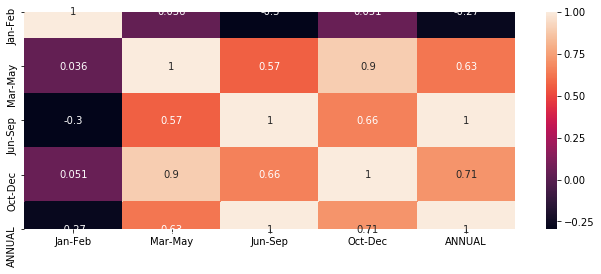

In [39]:
plt.figure(figsize=(11,4))
sns.heatmap(ap_data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']].corr(),annot=True)
plt.show()

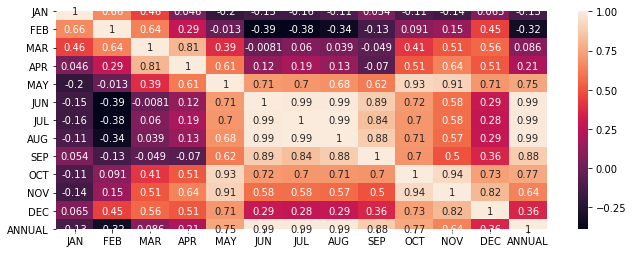

In [40]:
plt.figure(figsize=(11,4))
sns.heatmap(ap_data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

In [41]:
# testing and training for the complete data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(district[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
temp = district[['DISTRICT','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[district['STATE_UT_NAME'] == 'ANDHRA PRADESH']
hyd = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['DISTRICT'] == 'HYDERABAD'])
# print temp
X_year = None; y_year = None
for i in range(hyd.shape[1]-3):
    if X_year is None:
        X_year = hyd[:, i:i+3]
        y_year = hyd[:, i+3]
    else:
        X_year = np.concatenate((X_year, hyd[:, i:i+3]), axis=0)
        y_year = np.concatenate((y_year, hyd[:, i+3]), axis=0)
 

In [43]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

57.08862331011229


MEAN KARNATAKA
91.48888888888888 108.2025052233288
Standard deviation KARNATAKA
69.2514651982091 58.90326979488765


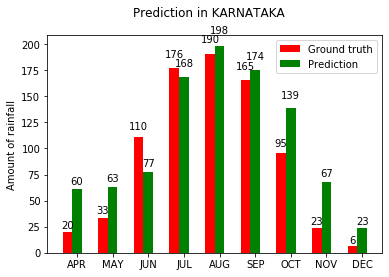

In [44]:
y_year_pred = reg.predict(X_year)
print("MEAN KARNATAKA")
print(np.mean(y_year),np.mean(y_year_pred))
print("Standard deviation KARNATAKA")
print(np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred)))

plot_graphs(y_year,y_year_pred,"Prediction in KARNATAKA")

In [45]:
from sklearn.svm import SVR

# SVM model
clf = SVR(gamma='auto', C=0.1, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

116.60671510825178


MEAN KARNATAKA
91.48888888888888 80.34903236716154
Standard deviation KARNATAKA
69.2514651982091 0.14736007434982146


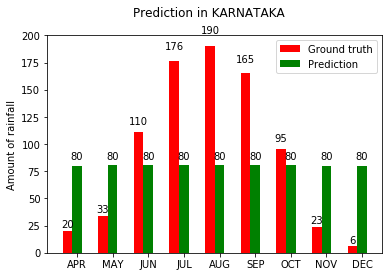

In [46]:
y_year_pred = clf.predict(X_year)
print("MEAN KARNATAKA")
print(np.mean(y_year),np.mean(y_year_pred))
print("Standard deviation KARNATAKA")
print(np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred)))

plot_graphs(y_year,y_year_pred,"Prediction in KARNATAKA")


In [47]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

Train on 4153 samples, validate on 462 samples
Epoch 1/10
4153/4153 [==============================] - 1s 147us/step - loss: 8555.2052 - mean_absolute_error: 58.2673 - val_loss: 4410.7873 - val_mean_absolute_error: 41.5807
Epoch 2/10
4153/4153 [==============================] - 1s 157us/step - loss: 6110.6565 - mean_absolute_error: 47.8101 - val_loss: 3974.0288 - val_mean_absolute_error: 38.9593
Epoch 3/10
4153/4153 [==============================] - 1s 144us/step - loss: 5565.8487 - mean_absolute_error: 45.1511 - val_loss: 3789.5366 - val_mean_absolute_error: 39.5621
Epoch 4/10
4153/4153 [==============================] - 1s 149us/step - loss: 5425.6557 - mean_absolute_error: 44.6322 - val_loss: 3934.0038 - val_mean_absolute_error: 38.9261
Epoch 5/10
4153/4153 [==============================] - 1s 144us/step - loss: 5377.5107 - mean_absolute_error: 44.3038 - val_loss: 4039.1042 - val_mean_absolute_error: 38.6938
Epoch 6/10
4153/4153 [==============================] - 1s 149us/step - l

MEAN KARNATAKA
91.48888888888888 108.684204
Standard deviation KARNATAKA
69.2514651982091 71.71047


TypeError: only size-1 arrays can be converted to Python scalars

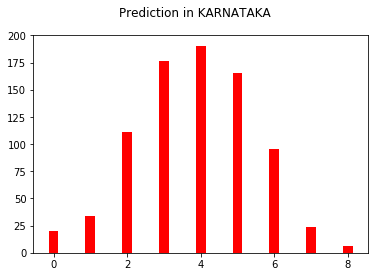

In [48]:
y_year_pred = model.predict(np.expand_dims(X_year, axis=2))
print("MEAN KARNATAKA")
print(np.mean(y_year),np.mean(y_year_pred))
print("Standard deviation KARNATAKA")
print(np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred)))


plot_graphs(y_year,y_year_pred,"Prediction in KARNATAKA")

In [ ]:
# training and testing sets for only KARNATAKA data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(ap_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

In [ ]:
y_year_pred = reg.predict(X_year)
print("MEAN KARNATAKA")
print(np.mean(y_year),np.mean(y_year_pred))
print("Standard deviation KARNATAKA")
print(np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred)))
plot_graphs(y_year,y_year_pred,"Prediction in KARNATAKA")

In [ ]:
from sklearn.svm import SVR
#from django_pg import models
# SVM model
clf = SVR(gamma='auto', C=0.1, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

In [ ]:
y_year_pred = clf.predict(X_year)
print("MEAN KARNATAKA")
print(np.mean(y_year),np.mean(y_year_pred))
print("Standard deviation KARNATAKA")
print(np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred)))
plot_graphs(y_year,y_year_pred,"Prediction in KARNATAKA")

In [ ]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

In [ ]:
y_year_pred = model.predict(np.expand_dims(X_year, axis=2))
print("MEAN KARNATAKA")
print(np.mean(y_year),np.mean(y_year_pred))
print("Standard deviation KARNATAKA")
print(np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred)))
plot_graphs(y_year,y_year_pred,"Prediction in KARNATAKA")
